In [1]:
cd ~/Desktop/workbench/fa21/cs285/hw3

/Users/gautam/Desktop/workbench/fa21/cs285/hw3


In [2]:
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
plt.style.use('seaborn')
plt.rcParams.update({'font.size': 22})
np.random.seed(seed=1)


def set_size(width_pt, fraction=1, subplots=(1, 1)):
    """Set figure dimensions to sit nicely in our document.
  
    Source: https://jwalton.info/Matplotlib-latex-PGF/
    """
    # Width of figure (in pts)
    fig_width_pt = width_pt * fraction
    # Convert from pt to inches
    inches_per_pt = 1 / 72.27

    # Golden ratio to set aesthetic figure height
    golden_ratio = (5**.5 - 1) / 2

    # Figure width in inches
    fig_width_in = fig_width_pt * inches_per_pt
    # Figure height in inches
    fig_height_in = fig_width_in * golden_ratio * (subplots[0] / subplots[1])

    return (fig_width_in, fig_height_in)

In [6]:
width, height = set_size(600 * 1.5, subplots=(1, 1))

### Experiment 1: Ms. Pacman

In [14]:
df_avg_return = pd.read_csv('logs/mspacman/run-q1_MsPacman-v0_19-10-2021_23-04-00-tag-Train_AverageReturn.csv')
df_best_return = pd.read_csv('logs/mspacman/run-q1_MsPacman-v0_19-10-2021_23-04-00-tag-Train_BestReturn.csv')

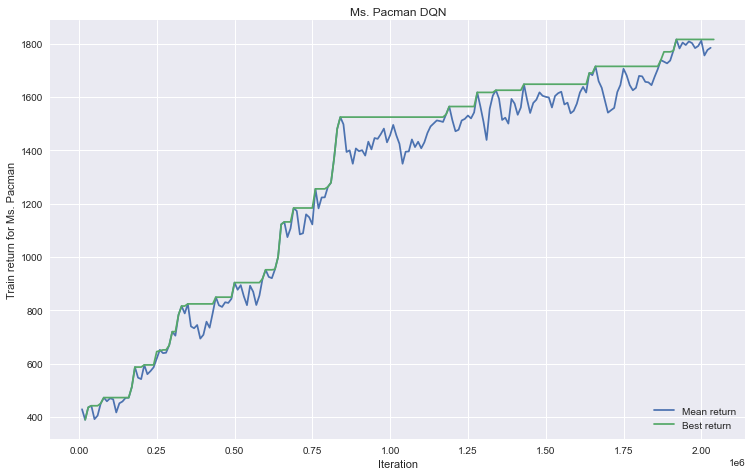

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(width, height))

max_steps = 200

steps = df_avg_return['Step'].values[:max_steps]
values = df_avg_return['Value'].values[:max_steps]
line, = ax.plot(steps, values)
# ax.fill_between(steps, values-std, values+std, alpha=0.3)
line.set_label('Mean return')

steps = df_best_return['Step'].values[:max_steps]
values = df_best_return['Value'].values[:max_steps]
line2, = ax.plot(steps, values)
line2.set_label('Best return')
    
ax.set_ylabel('Train return for Ms. Pacman')
ax.set_xlabel('Iteration')
ax.set_title('Ms. Pacman DQN')
ax.legend(frameon=False, loc='lower right')

### Experiment 2: DDQN (LunarLander-v3)

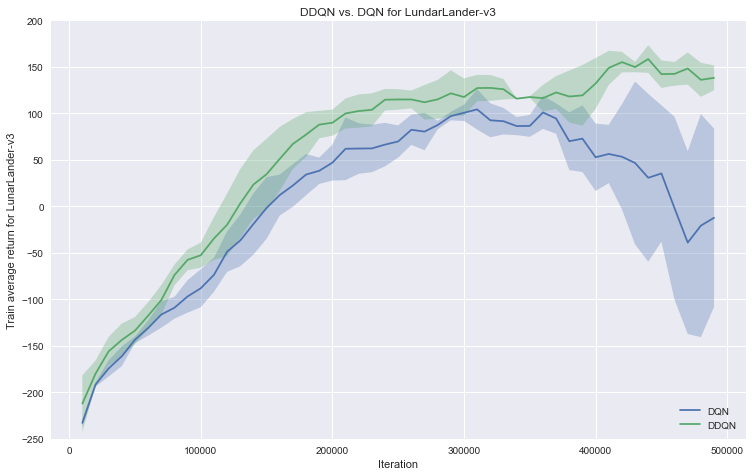

In [44]:
runs = glob.glob('logs/ddqn/*-Train_AverageReturn.csv')
dqn = [run for run in runs if '_dqn' in run]
ddqn = [run for run in runs if 'doubledqn' in run]

fig, ax = plt.subplots(1, 1, figsize=(width, height))

dqn_steps = []
dqn_run = []
ddqn_steps = []
ddqn_run = []
for run in dqn:
    df = pd.read_csv(run)
    steps = df['Step'].values
    values = df['Value'].values
    dqn_steps.append(steps)
    dqn_run.append(values)

for run in ddqn:
    df = pd.read_csv(run)
    steps = df['Step'].values
    values = df['Value'].values
    ddqn_steps.append(steps)
    ddqn_run.append(values)

values = np.mean(dqn_run, axis=0)
std = np.std(dqn_run, axis=0)
line, = ax.plot(dqn_steps[0], values)    
line.set_label('DQN')
ax.fill_between(dqn_steps[0], values-std, values+std, alpha=0.3)

values = np.mean(ddqn_run, axis=0)
std = np.std(ddqn_run, axis=0)
line2, = ax.plot(ddqn_steps[0], values)    
line2.set_label('DDQN')
ax.fill_between(ddqn_steps[0], values-std, values+std, alpha=0.3)

ax.set_ylabel('Train average return for LunarLander-v3')
ax.set_xlabel('Iteration')
ax.set_title('DDQN vs. DQN for LundarLander-v3')
ax.set_ylim([-250, 200])
ax.legend(frameon=False, loc='lower right')

### Experiment 3: Hyperparameter Sweep

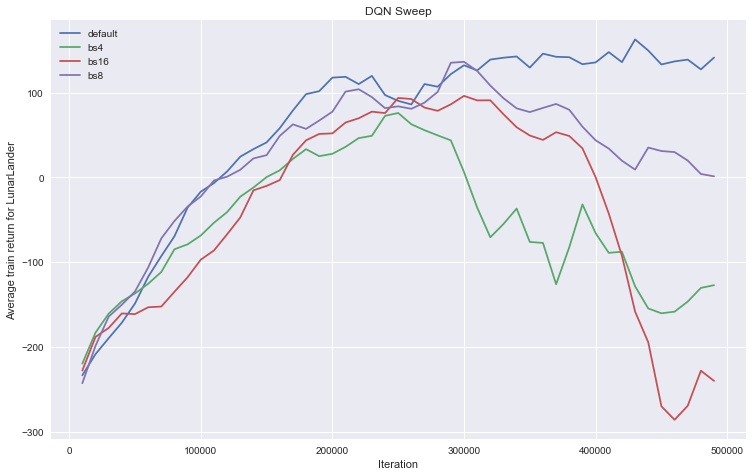

In [76]:
runs = glob.glob('logs/sweep/*-Train_AverageReturn.csv')

fig, ax = plt.subplots(1, 1, figsize=(width, height))

for run in runs:
    df = pd.read_csv(run)
        
    param_str = run.split('q3_')[-1].split('_Lunar')[0].split('_')[0]
    steps = df['Step'].values
    values = df['Value'].values
    line, = ax.plot(steps, values)
    line.set_label(param_str)
    
ax.set_ylabel('Average train return for LunarLander')
ax.set_xlabel('Iteration')
ax.set_title('DQN Sweep')
ax.legend(frameon=False, loc='upper left')

### Experiment 4: Actor-Critic with Cartpole

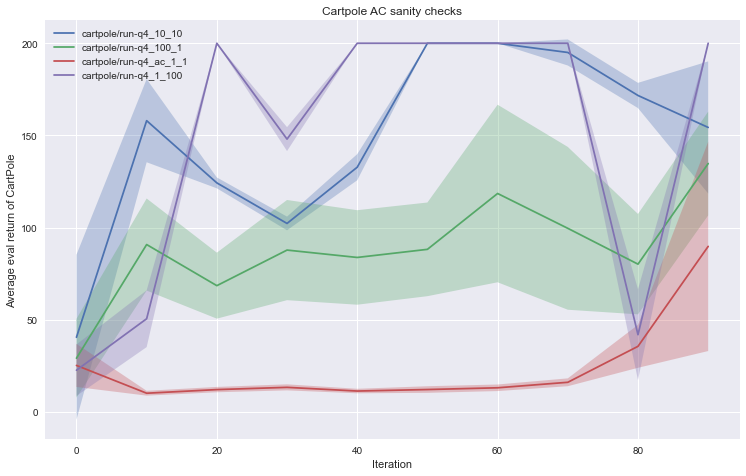

In [63]:
runs = glob.glob('logs/cartpole/*-Eval_AverageReturn.csv')

fig, ax = plt.subplots(1, 1, figsize=(width, height))

for run in runs:
    df = pd.read_csv(run)
    
    std_run = ''.join(run.split('-Eval_AverageReturn.csv') + ['-Eval_StdReturn.csv'])
    std_df = pd.read_csv(std_run)
    std = std_df['Value'].values
    
    param_str = run.split('_CartPole')[0].split('logs/')[-1]
    steps = df['Step'].values
    values = df['Value'].values
    line, = ax.plot(steps, values)
    ax.fill_between(steps, values-std, values+std, alpha=0.3)
    line.set_label(param_str)
    
ax.set_ylabel('Average eval return of CartPole')
ax.set_xlabel('Iteration')
ax.set_title('Cartpole AC sanity checks')
ax.legend(frameon=False, loc='upper left')

### Experiment 5: Actor-critic with InvertedPendulum and HalfCheetah

Text(0.5, 1.0, 'InvertedPendulum experiment')

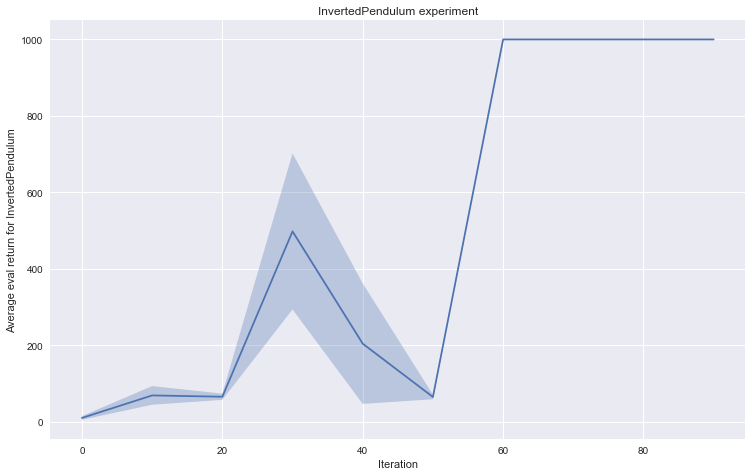

In [60]:
runs = glob.glob('logs/pendulum/*-Eval_AverageReturn.csv')

fig, ax = plt.subplots(1, 1, figsize=(width, height))

for run in runs:
    df = pd.read_csv(run)
    
    std_run = ''.join(run.split('-Eval_AverageReturn.csv') + ['-Eval_StdReturn.csv'])
    std_df = pd.read_csv(std_run)
    std = std_df['Value'].values
    
    param_str = run.split('_search_')[-1].split('_rtg')[0]
    steps = df['Step'].values
    values = df['Value'].values
    line, = ax.plot(steps, values)
    ax.fill_between(steps, values-std, values+std, alpha=0.3)
#     line.set_label(label_str)
    
ax.set_ylabel('Average eval return for InvertedPendulum')
ax.set_xlabel('Iteration')
ax.set_title('InvertedPendulum experiment')
# ax.legend(frameon=False, loc='upper left')

Text(0.5, 1.0, 'HalfCheetah experiment')

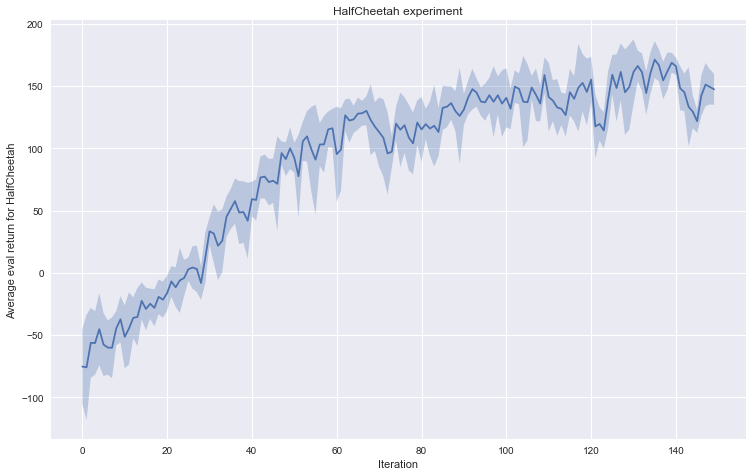

In [62]:
runs = glob.glob('logs/halfcheetah/*-Eval_AverageReturn.csv')

fig, ax = plt.subplots(1, 1, figsize=(width, height))

for run in runs:
    df = pd.read_csv(run)
    
    std_run = ''.join(run.split('-Eval_AverageReturn.csv') + ['-Eval_StdReturn.csv'])
    std_df = pd.read_csv(std_run)
    std = std_df['Value'].values
    
    param_str = run.split('_search_')[-1].split('_rtg')[0]
    steps = df['Step'].values
    values = df['Value'].values
    line, = ax.plot(steps, values)
    ax.fill_between(steps, values-std, values+std, alpha=0.3)
#     line.set_label(label_str)
    
ax.set_ylabel('Average eval return for HalfCheetah')
ax.set_xlabel('Iteration')
ax.set_title('HalfCheetah experiment')
# ax.legend(frameon=False, loc='upper left')